# Python Tutorial 4

Today will be a short intro to Pandas followed by a walk-through example.

1. [List comprehension](#l)
2. [Nested Scripts](#ns)
3. [Advanced Numpy](#an)
4. [Excercise](#ex)

<a id='l'></a>
## List comprehension

In [54]:
import numpy as np

In [55]:
%%timeit

a = []
for l in range(100000):
    a.append(l)

7.39 ms ± 362 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
%timeit b = [l for l in range(100000)] 

3.13 ms ± 97.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<a id='ns'></a>
## Nested Scripts

In [57]:
import test

In [58]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9C1B-09F5

 Directory of c:\Users\papatrott\Documents\CUA_summer_students\weekly_work\7_13_2021\talks

07/14/2021  11:28 PM    <DIR>          .
07/14/2021  11:28 PM    <DIR>          ..
07/14/2021  11:25 PM    <DIR>          .ipynb_checkpoints
07/14/2021  11:28 PM    <DIR>          __pycache__
07/15/2021  12:28 AM    <DIR>          jnb_files
07/15/2021  12:58 AM             5,472 Richard_py_tutorial4.ipynb
07/14/2021  11:28 PM               334 test.py
               2 File(s)          5,806 bytes
               5 Dir(s)  63,015,145,472 bytes free


In [59]:
test.runScript()

Hello...


<a id='an'></a>
## Advanced Numpy 

Here we are going to quickly cover some more advanced numpy techniques.

### Advanced Indexing

Numpy can be indexed by sequences beyond just integers (e.g. lists, tuples, arrays of integers, etc.).

In [60]:
a = np.linspace(0.,0.5,6)
print(a)

[0.  0.1 0.2 0.3 0.4 0.5]


In [61]:
# Define our indexes
ia = [1,4,5]

In [62]:
# Plugging in our index list to our array we get only the elements at 1,4,5
print(a[ia])

[0.1 0.4 0.5]


In [63]:
# Redefine our indexing as a numpy array of integers
ia = np.array(((1,2),(2,1)))

In [64]:
# Plugging in our index array we now get a 2D array for a where the first dimension is elements 1,2 and the second is elements 2,1
print(a[ia])

[[0.1 0.2]
 [0.2 0.1]]


In [65]:
# Now we redefine our indexing as an array of boolean statements
ia = np.array([False,True,False,True,True,False])

In [66]:
# Plugging in our index array we now remove all False elements
print(a[ia])

[0.1 0.3 0.4]


### Adding dimensions to an array

Now wer want to add a dimension (or axis) to an array

In [67]:
a = np.linspace(1,4,4)
print(a)

[1. 2. 3. 4.]


In [69]:
# We use the reshape method to change a into a 2D array (ie rank 2) where each dimension has two elements
a = a.reshape(2,2)
print(a)

[[1. 2.]
 [3. 4.]]


In [71]:
# Similarly we can make it 4D where each dimension has 1 element
a = np.linspace(1,4,4)
a = a.reshape(4,1)
print(a)

[[1.]
 [2.]
 [3.]
 [4.]]


### Meshes

A meshgrid is used for multidimensional functions on a grid of points. It is a way to represent N-dimensional coordinates.

You can't plot two arrays of different sizes so meshgrid is a great way to avoid this issue by creating a grid.

In [74]:
x = np.linspace(0,5,6)
y = np.linspace(0,3,4)
print(x)
print(y)

[0. 1. 2. 3. 4. 5.]
[0. 1. 2. 3.]


In [77]:
x,y = np.meshgrid(x,y)
print(x)
print(y)

[[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]]
[[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3.]]


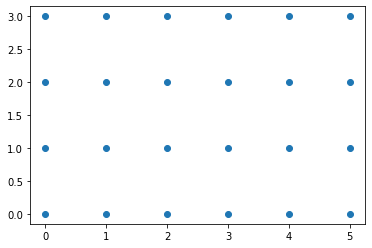

In [79]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.show()

<a id='ex'></a>
## Excercise

### Excercise 1

Let's try to produce a plot of the [electrostatic potential of a point dipole](https://en.wikipedia.org/wiki/Electric_dipole_moment). Specifically, plot the electrostatic potential of an electric dipole $\vec{p}=(qd,0,0)$ in the (x,y) plane for the charge of an electron (in coulombs) at a distance d = 1 pm (picometer) using the dipole approximation.

![](jnb_files/dipole.png)

1. Define the constants you will need. (base unit meters)
    * charge, permittivity of free space, etc.
2. Using the meshgrid method of numpy, create the Cartesian axis with the origin at the diple (in meters).
    * Hint: Use the linspace method of numpy to create 1000 events between -5e-11 and 5e-11 (ie. d = 1 pm)
3. Define the electrostatic potential using the point dipole approximation
    * This may be the most challenging part depending on what classes you have taken. If you are not familiar with vectors let me know and I can give you a quick explainer
    * If you see a notation like $|a-b|$, this is the distance between two vectors. There is a built in numpy method called hypot which should be used for this.
        * e.g. $|a-b|$ == np.hypot(a,b)
4. Draw the contours at values of the electrostatic potential given
    * [More info on contour plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html)
    * To get this to work properly, you will also need to specify the contour lines at specified levels,
        * Do this with the following code...
            > levels = np.array([10**pw for pw in np.linspace(0,5,20)])
            
            > levels = sorted(list(-levels) + list(levels))